설정

In [29]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

IS_COLAB = "google.colab" in sys.modules

import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
  print("감지된 GPU가 없습니다. GPU가 없으면 CNN은 매우 느릴 수 있습니다.")
  if IS_COLAB:
    print("런타임 > 런타임 유형 변경 메뉴를 선택하고 하드웨어 가속기로 GPU를 고르세요")

import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok = True)

def save_fig(fig_id, tight_layout = True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("그림 저장", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi = resolution)


MNIST 데이터 가져오기

In [30]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

모델 설정

In [36]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=32, input_shape=[28, 28, 1]),
    DefaultConv2D(filters=32),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax')
])

모델 요약

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                401472    
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                      

모델 컴파일(epoch = 10)

In [33]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.5247 - accuracy: 0.8222 - val_loss: 0.2936 - val_accuracy: 0.8926
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3406 - accuracy: 0.8815 - val_loss: 0.2548 - val_accuracy: 0.9072
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2875 - accuracy: 0.8989 - val_loss: 0.2386 - val_accuracy: 0.9138
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2517 - accuracy: 0.9085 - val_loss: 0.2319 - val_accuracy: 0.9148
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2260 - accuracy: 0.9187 - val_loss: 0.2244 - val_accuracy: 0.9188
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2058 - accuracy: 0.9241 - val_loss: 0.2396 - val_accuracy: 0.9230
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1885 - accuracy: 0.9291 - val_loss: 0.2273 - val_acc

1/1 [==============================] - 0s 61ms/step


그래프 출력

그림 저장 HW#04


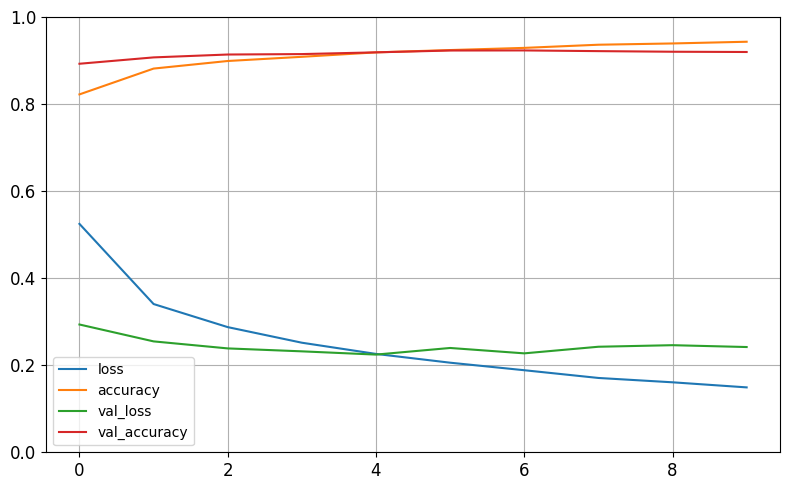

In [34]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("HW#04")
plt.show()

모델 평가

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2684 - accuracy: 0.9217


[0.2683514952659607, 0.9217000007629395]